<font size = 10> **Creating a mask for MEASO regions** </font>

# Loading relevant libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
import regionmask
import numpy as np
%matplotlib inline

# Loading shapefile with MEASO regions
MEASO regions being used in the analysis were shared by A. Constable on 2021-06-24.

In [2]:
#Note that the full file path is being used.
regions = geopandas.read_file(r'/g/data/v45/la6889/GIS_DataBase/Shapefiles/MEASO_shapes_withShelf/MEASO_shapes_withShelf.shp')
regions

,name,sector,zone,geometry
0,WPA-O,West Pacific,Antarctic Open,"POLYGON ((-125.00000 -65.20000, -125.00000 -65..."
1,WPA-N,West Pacific,Antarctic Shelf,"POLYGON ((-125.00000 -72.25443, -125.00000 -72..."
2,WPA-O,West Pacific,Antarctic Open,"POLYGON ((-180.00000 -72.36900, -180.00000 -72..."
3,WPS,West Pacific,Subantarctic,"POLYGON ((-125.00000 -56.80000, -125.00000 -57..."
4,WPN,West Pacific,Northern,"POLYGON ((-125.00000 -40.00000, -125.00000 -40..."
5,WPT,West Pacific,Temperate,"POLYGON ((-125.00000 -30.00000, -125.00000 -30..."
6,EPA-N,East Pacific,Antarctic Shelf,"POLYGON ((-125.00000 -75.00184, -125.00000 -75..."
7,EPA-O,East Pacific,Antarctic Open,"POLYGON ((-125.00000 -72.25443, -125.00000 -72..."
8,EPS,East Pacific,Subantarctic,"POLYGON ((-125.00000 -65.20000, -125.00000 -65..."
9,EPN,East Pacific,Northern,"POLYGON ((-125.00000 -56.80000, -125.00000 -56..."


# Loading ACCESS-ESM1.5 data sample for the Southern Ocean 

In [3]:
SO = xr.open_dataarray('SST_SO.nc')
SO

<xarray.DataArray 'bigthetao' (latitude: 77, longitude: 360)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [ 3.244226,  3.272089,  3.174737, ...,  2.784357,  2.931512,  3.104639],
       [ 2.567956,  2.685449,  2.677911, ...,  2.113763,  2.208887,  2.373895],
       ...,
       [23.301233, 23.17544 , 23.104883, ..., 23.813715, 23.583063, 23.438684],
       [23.353235, 23.291712, 23.208216, ..., 23.555048, 23.44192 , 23.384241],
       [23.558496, 23.521143, 23.406214, ..., 23.520441, 23.539026, 23.533503]],
      dtype=float32)
Coordinates:
    time       datetime64[ns] ...
    lev        float64 ...
  * latitude   (latitude) float64 -77.88 -77.63 -77.38 ... -32.5 -31.5 -30.5
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:   sea_water_conservative_temperature
    long_name:       Sea Water Conservative Temperature
    comment:         Sea water conservative temperature (this should be contr...
    units:           degC
    original_units:  K
    history:         2019-11-15T15:50:50Z altered by CMOR: Converted units fr...
    cell_methods:    area: mean where sea time: mean
    cell_measures:   area: areacello volume: volcello

# Checking MEASO regions and ACCESS-ESM1.5 data are correctly aligned

<AxesSubplot:title={'center':'time = 2000-01-16T12:00:00, lev = 5.0'}, xlabel='longitude', ylabel='latitude'>

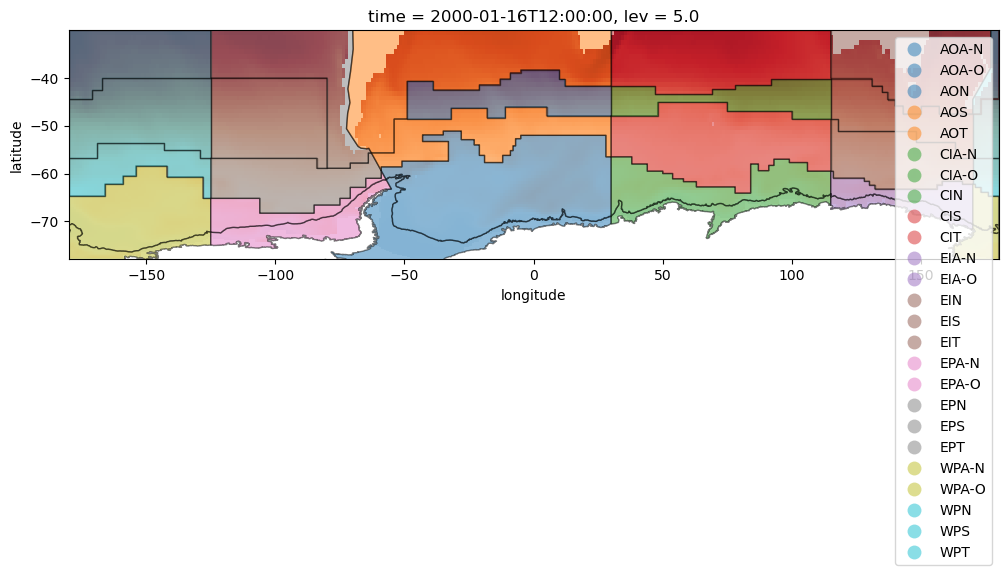

In [4]:
# Plot shapefile over the raster to ensure they both have the same CRS and cover the same area
#Initialise figure
fig, ax = plt.subplots(figsize = (12, 15))

#Plot just one timestep of the data array
# sst_upper200mean_SO[0].plot(ax = ax, add_colorbar = False)
SO.plot(ax = ax, add_colorbar = False)

#Plot shapefile over the top and show each sector in different colour
regions.plot(ax = ax, column = 'name', legend = True, alpha = 0.5, edgecolor = 'black')

# Creating an xarray mask of the MEASO regions

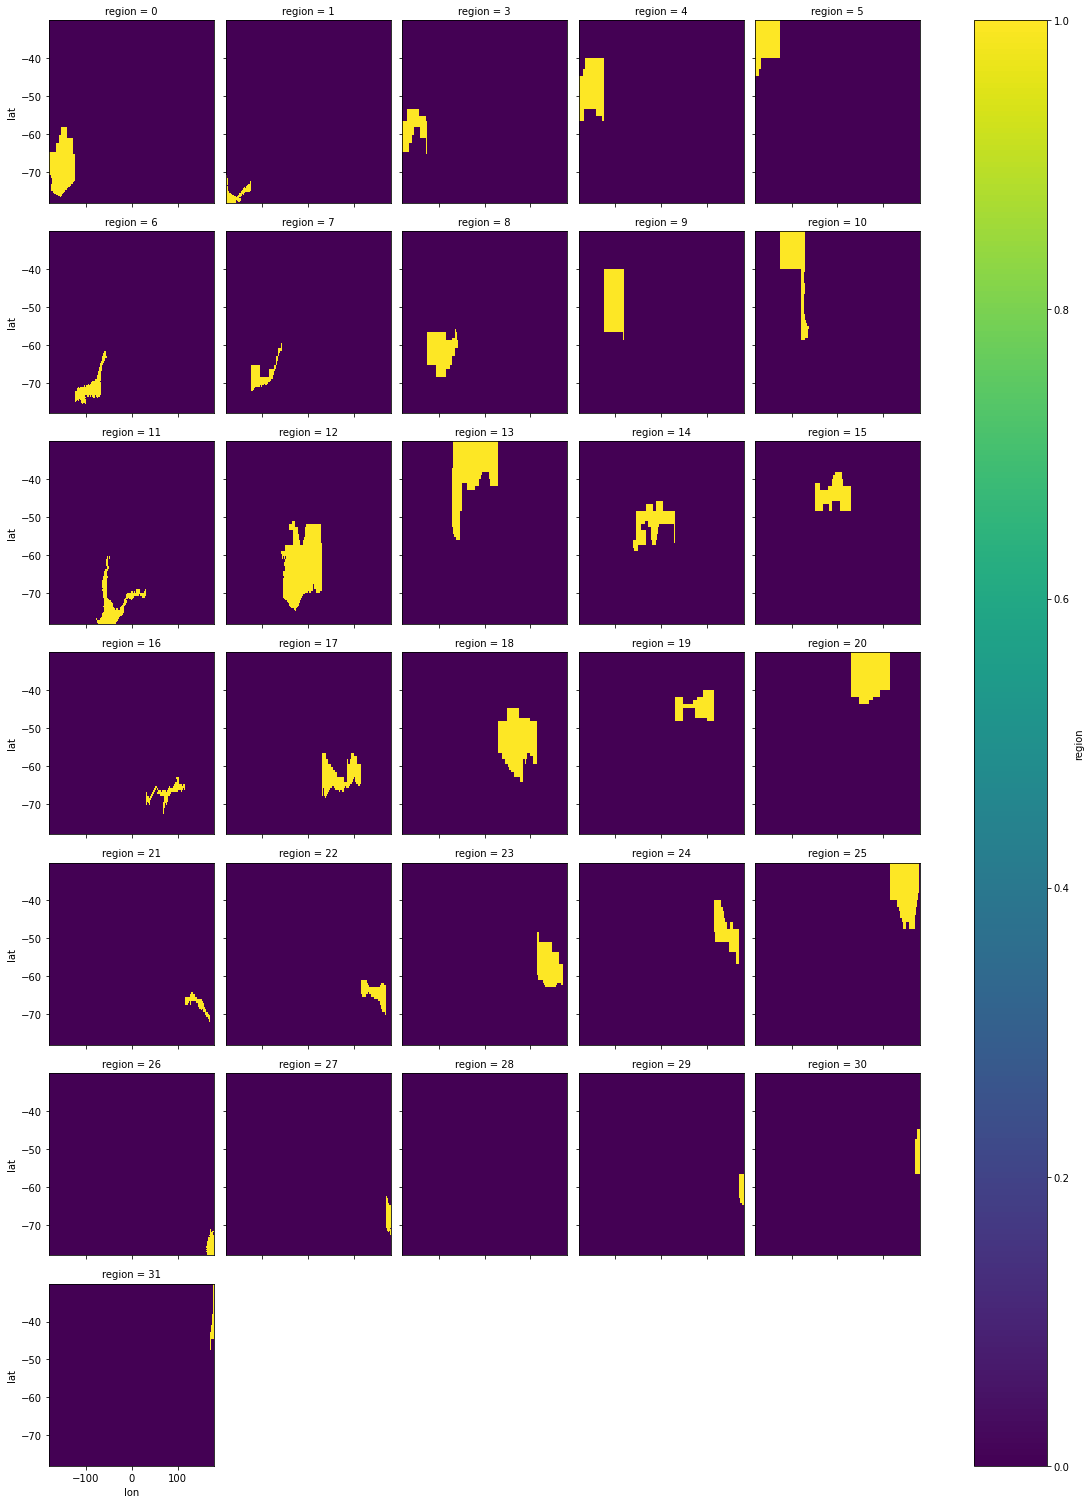

In [4]:
# Extracting latitude and longitude values from SO data array
longitude = SO['longitude'].values
latitude = SO['latitude'].values

#Creating a 3D mask, which includes regions as a dimension
mask3D = regionmask.mask_3D_geopandas(regions, longitude, latitude)
#Plotting all regions within mask to check they are correct
mask3D.plot(col = 'region', col_wrap = 5)

## Renaming regions
When the mask was created, numeric values were assigned to the `region` dimension which correspond to their index in the shapefile used to create the mask. In this step, regions will be renamed so the shorten version of its name (column `name` in the shapefile) will appear as the value in the `region` dimension of the mask.

In [5]:
#Getting names of regions from the shapefile to include them in mask (keep the same order as they appear)
reg_names = regions.name.values.tolist()

#Remove the third item in the list as it is not included in the mask (see figure above) 
del reg_names[2]

#Replacing numbered regions for names in the mask
mask3D['region'] = reg_names

#Checking results
mask3D.region

<xarray.DataArray 'region' (region: 31)>
array(['WPA-O', 'WPA-N', 'WPS', 'WPN', 'WPT', 'EPA-N', 'EPA-O', 'EPS', 'EPN',
       'EPT', 'AOA-N', 'AOA-O', 'AOT', 'AOS', 'AON', 'CIA-N', 'CIA-O', 'CIS',
       'CIN', 'CIT', 'EIA-N', 'EIA-O', 'EIS', 'EIN', 'EIT', 'WPA-N', 'WPA-O',
       'WPA-N', 'WPS', 'WPN', 'WPT'], dtype='<U5')
Coordinates:
  * region   (region) <U5 'WPA-O' 'WPA-N' 'WPS' 'WPN' ... 'WPS' 'WPN' 'WPT'

## Merging duplicate West Pacific areas
Areas within the West Pacific sector appear twice in the mask. This is because these areas are split in two along the -180/+180 longitude boundary.  
Areas with the same name will be summed together. Since each area is a boolean, the resulting data array will include `True` only for pixels within the boundaries of each area.  
*Remember boolean data represent `True` as `1` and `False` as `0`.*

In [6]:
#Creating a list of areas within the West Pacific sector
WP_regions = np.unique(regions.query('sector == "West Pacific"').name.values).tolist()

#Now create a list with all other areas
non_WP_regions = np.unique(regions.query('sector != "West Pacific"').name.values).tolist()

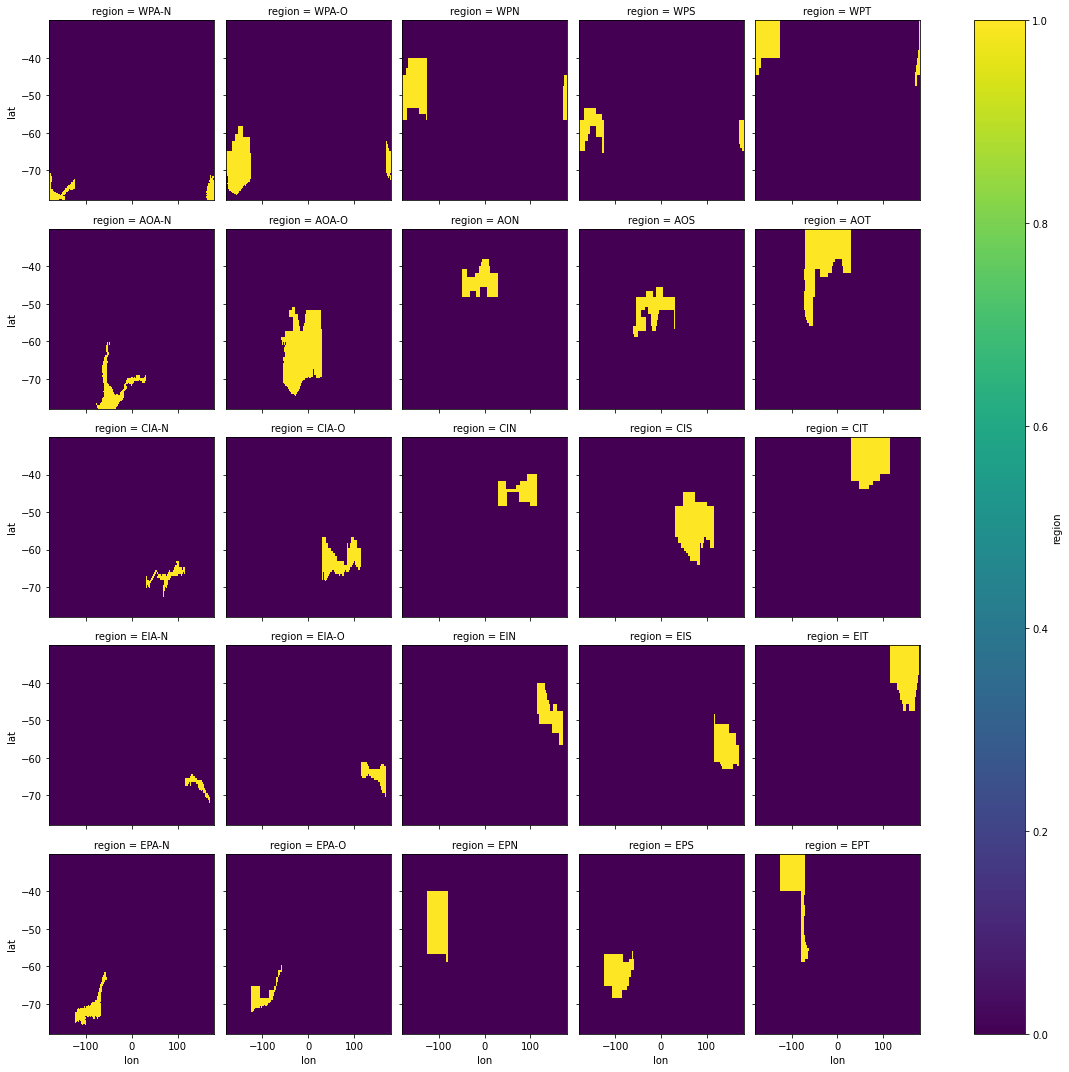

In [7]:
#Creating an empty variable to store the corrected areas
corr_reg = []

#We will loop through each West Pacific area
for i in WP_regions:
    reg = [i]
    #Sum together areas with the same value under region
    x = mask3D.sel(region = i).sum('region')
    #Include the region dimension again as this will be automatically dropped after summing
    x = x.expand_dims({'region': reg})
    #Include resulting data arrays in the empty variable created at the beginning of this section
    corr_reg.append(x)

#Add all other areas outside the West Pacific to the variable created above 
for i in non_WP_regions:
    #The data for each region is selected an added to variable. No calculations are performed in this step
    x = mask3D.sel(region = i)
    corr_reg.append(x)

#Concatenate all information into one new data array
corrected_mask = xr.concat(corr_reg, 'region')

#Checking the final result, which should include 25 areas in total
corrected_mask.plot(col = 'region', col_wrap = 5)

## Replacing zero values with NaN

In [8]:
corrected_mask = corrected_mask.where(corrected_mask != 0)

## Renaming coordinate dimensions
Coordinate dimensions are renamed so they match the names in ACCESS-ESM1.5.

In [9]:
corrected_mask = corrected_mask.rename({'lon': 'longitude','lat': 'latitude'})

## Checking mask has been correctly calculated

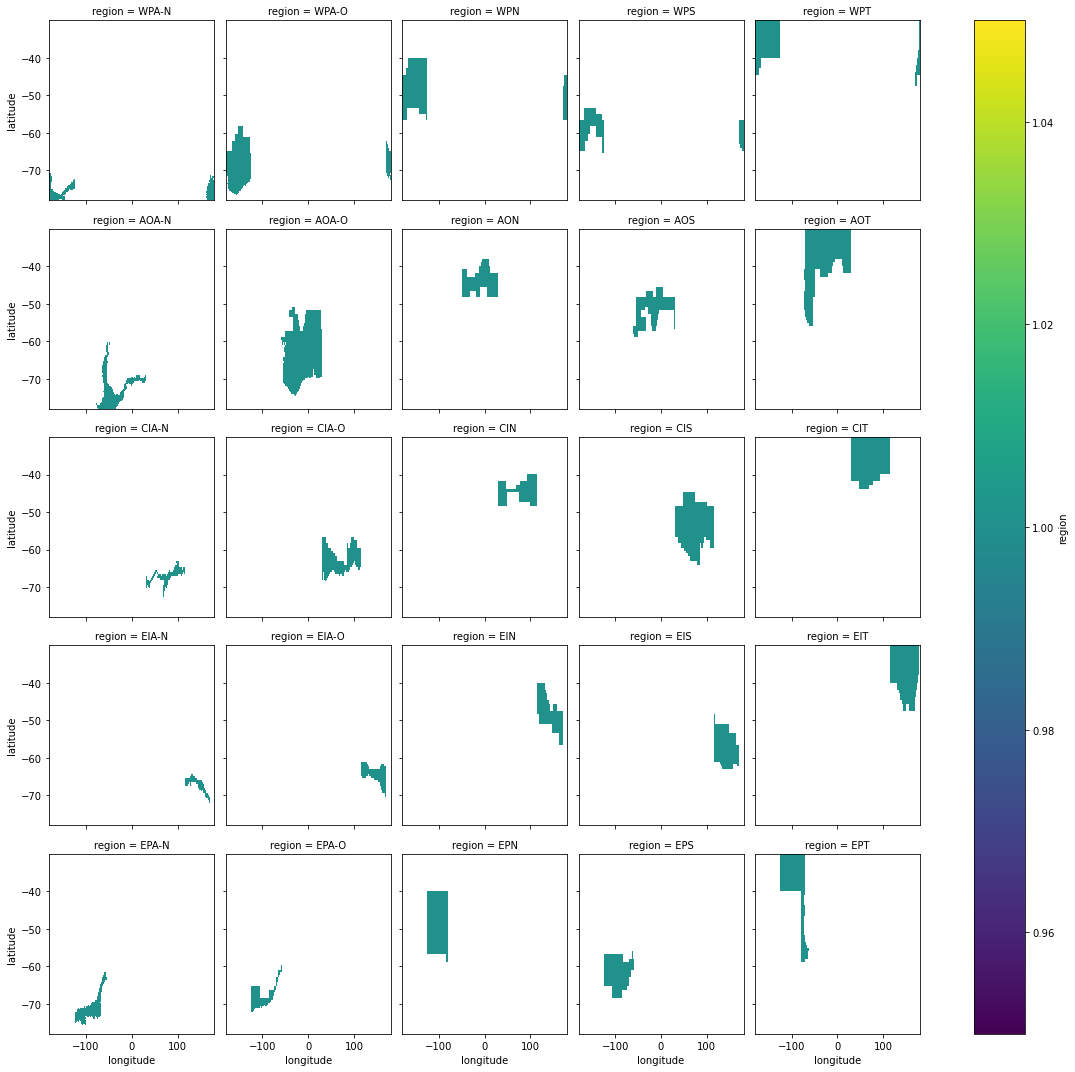

In [10]:
corrected_mask.plot(col = 'region', col_wrap = 5)

## Saving the result mask

In [53]:
corrected_mask.to_netcdf('MEASO_3Dmask.nc')

# Creating two-dimensional mask

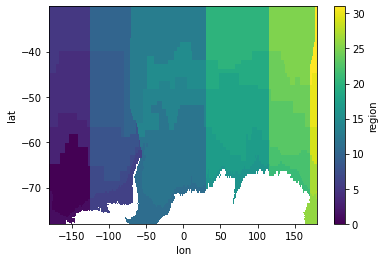

In [11]:
# Extracting latitude and longitude values from SO data array
longitude = SO['longitude'].values
latitude = SO['latitude'].values

#Creating a 3D mask, which includes regions as a dimension
mask = regionmask.mask_geopandas(regions, longitude, latitude)
#Plotting all regions within mask to check they are correct
mask.plot()

## Getting ID for MEASO regions in 2D mask

In [12]:
#Getting region name and IDs from shapefile
reg_names = regions.name.values.tolist()
#Removing region that does not show in the mask 
del reg_names[2]

#Create a pandas data frame with MEASO regions and IDs
region_key = pd.DataFrame(list(zip(np.unique(mask.values), reg_names)), columns = ['Region_ID', 'Region_name'])

## Merging duplicate West Pacific areas

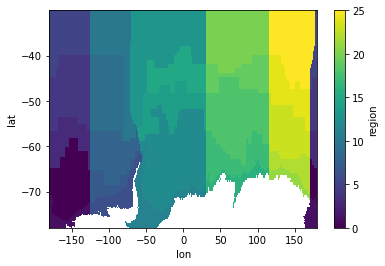

In [13]:
corrected_mask2D = mask
for i in WP_regions:
    key = region_key.Region_ID[region_key.Region_name == i].values
    corrected_mask2D = xr.where(corrected_mask2D == key[1], key[0], corrected_mask2D)
#Manually correct region 28 (WPA-N)
corrected_mask2D = xr.where(corrected_mask2D == 28, 1., corrected_mask2D)
#Check results
corrected_mask2D.plot()

### Correcting latitude and longitude names

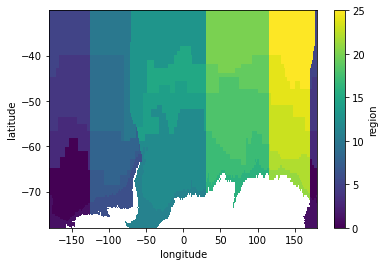

In [14]:
corrected_mask2D = corrected_mask2D.rename({'lon': 'longitude','lat': 'latitude'})
corrected_mask2D.plot()

## Saving keys and 2D mask for MEASO regions

In [15]:
#Filtering out repeated duplicated region names
region_key = region_key[np.isin(region_key.Region_ID, np.unique(corrected_mask2D.values))]
#Saving keys
region_key.to_csv('/g/data/v45/la6889/MEASO/MEASO_RegionKeys.csv', index = False)

In [16]:
corrected_mask2D.to_netcdf('MEASO_2Dmask.nc')